# CNN AlexNet


## Loading and preprocessing the data


In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import itertools
import pandas as pd

In [15]:
mnist = tf.keras.datasets.mnist

(X_train_, y_train), (X_test_, y_test) = mnist.load_data()
X_train_, X_test_ = (
    X_train_.astype(np.float32) / 255.0,
    X_test_.astype(np.float32) / 255.0,
)

In [16]:
# Add another dimension
X_train = X_train_[..., np.newaxis]
X_test = X_test_[..., np.newaxis]
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [17]:
# Reduce dimension size
np.random.seed(0)

REDUCE_DIM = 2000
idx = np.random.permutation(REDUCE_DIM)

X_train = X_train[idx]
y_train = y_train[idx]
X_test = X_test[idx]
y_test = y_test[idx]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2000, 28, 28, 1)
(2000, 28, 28, 1)
(2000,)
(2000,)


In [18]:
y_test

array([4, 5, 2, ..., 5, 6, 7], dtype=uint8)

## Resize image


In [19]:
image_size = [227, 227]

X_train_resize = tf.image.resize(
    X_train,
    size=image_size,
    method=tf.image.ResizeMethod.BICUBIC,
    preserve_aspect_ratio=False,
    antialias=False,
    name=None,
).numpy()

X_test_resize = tf.image.resize(
    X_test,
    size=image_size,
    method=tf.image.ResizeMethod.BICUBIC,
    preserve_aspect_ratio=False,
    antialias=False,
    name=None,
).numpy()

print(X_train_resize.shape)
print(X_test_resize.shape)

(2000, 227, 227, 1)
(2000, 227, 227, 1)


In [20]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential(
    [
        tf.keras.Input(shape=(227, 227, 1)),
        tf.keras.layers.Conv2D(
            filters=96,
            kernel_size=(11, 11),
            strides=(4, 4),
            padding="valid",
            activation="relu",
            name="C1",
        ),
        tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2), name="S2"),
        tf.keras.layers.Conv2D(
            filters=256,
            kernel_size=(5, 5),
            strides=(1, 1),
            activation="relu",
            padding="same",
            name="C3",
        ),
        tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2), name="S4"),
        tf.keras.layers.Conv2D(
            filters=384,
            kernel_size=(3, 3),
            strides=(1, 1),
            activation="relu",
            padding="same",
            name="C5",
        ),
        tf.keras.layers.Conv2D(
            filters=384,
            kernel_size=(3, 3),
            strides=(1, 1),
            activation="relu",
            padding="same",
            name="C6",
        ),
        tf.keras.layers.Conv2D(
            filters=256,
            kernel_size=(3, 3),
            strides=(1, 1),
            activation="relu",
            padding="same",
            name="C7",
        ),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation="relu", name="F8"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation="relu", name="F9"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 C1 (Conv2D)                 (None, 55, 55, 96)        11712     
                                                                 
 S2 (MaxPooling2D)           (None, 27, 27, 96)        0         
                                                                 
 C3 (Conv2D)                 (None, 27, 27, 256)       614656    
                                                                 
 S4 (MaxPooling2D)           (None, 13, 13, 256)       0         
                                                                 
 C5 (Conv2D)                 (None, 13, 13, 384)       885120    
                                                                 
 C6 (Conv2D)                 (None, 13, 13, 384)       1327488   
                                                                 
 C7 (Conv2D)                 (None, 13, 13, 256)       8

In [22]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [23]:
tf_fit = model.fit(X_train_resize, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
57/57 [==============================] - 34s 584ms/step - loss: 2.3268 - accuracy: 0.1094 - val_loss: 2.2963 - val_accuracy: 0.1000
Epoch 2/20
57/57 [==============================] - 35s 606ms/step - loss: 2.2174 - accuracy: 0.1689 - val_loss: 1.8393 - val_accuracy: 0.3700
Epoch 3/20
57/57 [==============================] - 34s 602ms/step - loss: 1.7383 - accuracy: 0.3661 - val_loss: 1.1513 - val_accuracy: 0.7550
Epoch 4/20
57/57 [==============================] - 33s 582ms/step - loss: 1.2938 - accuracy: 0.5556 - val_loss: 0.6282 - val_accuracy: 0.8750
Epoch 5/20
57/57 [==============================] - 33s 586ms/step - loss: 1.0721 - accuracy: 0.6489 - val_loss: 0.5790 - val_accuracy: 0.9200
Epoch 6/20
57/57 [==============================] - 34s 593ms/step - loss: 0.9300 - accuracy: 0.6994 - val_loss: 0.3313 - val_accuracy: 0.9150
Epoch 7/20
57/57 [==============================] - 35s 608ms/step - loss: 0.8084 - accuracy: 0.7428 - val_loss: 0.3185 - val_accuracy: 0.9150

In [24]:
# Inspect the training history
df = pd.DataFrame(tf_fit.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,2.326787,0.109444,2.296305,0.100
1,2.217397,0.168889,1.839323,0.370
2,1.738254,0.366111,1.151253,0.755
3,1.293753,0.555556,0.628217,0.875
4,1.072095,0.648889,0.578959,0.920


<Axes: title={'center': 'Loss'}, xlabel='Epoch', ylabel='Loss'>

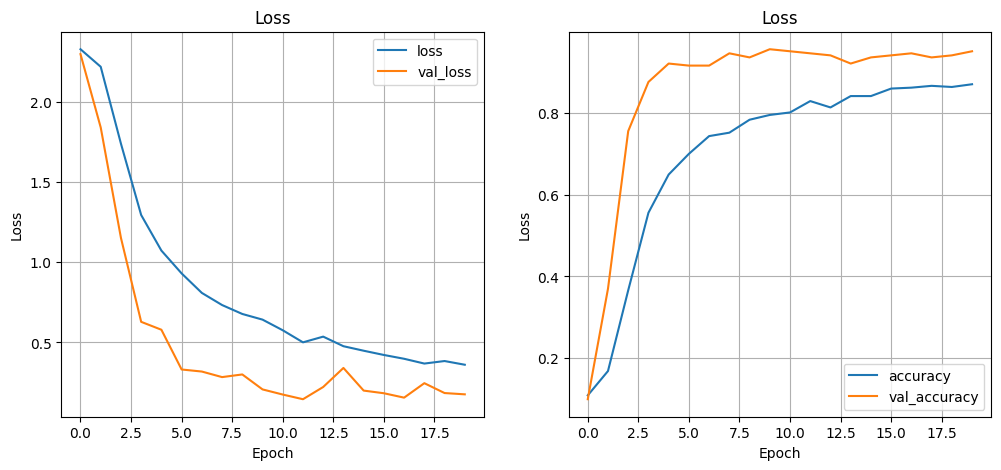

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

df[["loss", "val_loss"]].plot(
    ax=axes[0], title="Loss", grid=True, legend=True, xlabel="Epoch", ylabel="Loss"
)

df[["accuracy", "val_accuracy"]].plot(
    ax=axes[1], title="Loss", grid=True, legend=True, xlabel="Epoch", ylabel="Loss"
)

In [26]:
test_results = model.evaluate(X_test_resize, y_test)
print("\nTest Acc. {:.2f}%".format(test_results[1] * 100))

63/63 [==============================] - 8s 119ms/step - loss: 0.2257 - accuracy: 0.9465

Test Acc. 94.65%


In [27]:
# Find misclassification
y_pred_tf = model(X_test_resize)
y_pred_tf.numpy().shape

y_pred = tf.math.argmax(y_pred_tf, axis=1).numpy()
print(y_pred.shape)
print(y_test.shape)

loc = y_pred != y_test
print(f"Missclassification = {loc.sum()}")

(2000,)
(2000,)
Missclassification = 107


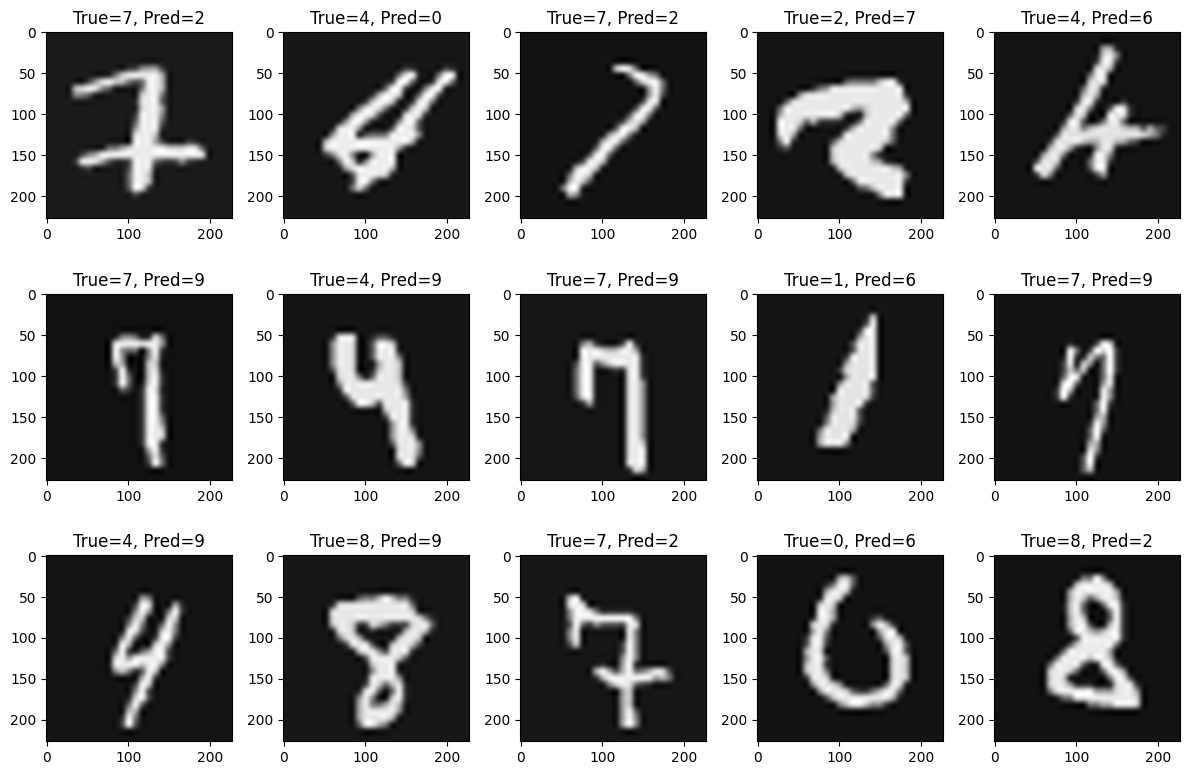

In [28]:
fig, axes2D = plt.subplots(3, 5, figsize=(12, 8))
axes = list(itertools.chain.from_iterable(axes2D))  # Flatten 2D list
X_test_miss = X_test_resize[loc]
y_test_miss = y_test[loc]
y_pred_miss = y_pred[loc]
for idx, ax in enumerate(axes):
    ax.imshow(X_test_miss[idx], cmap="gray")
    ax.set_title(f"True={y_test_miss[idx]}, Pred={y_pred_miss[idx]}")
fig.tight_layout()
plt.show()